## Hipotése 1:

# Será que existe o GDP per capita possui alguma proporcionalidade em relação ao consumo de carvão mineral (tones oil equivalent)

#### .Comparar países da OECD com países que não são da OECD

# Importando as bibliotecas utilizadas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lendo as planilhas utilizadas

In [2]:
GDP_capita_growth = pd.read_excel("gdp_per_capita_yearly_growth.xlsx")
Consumo_carvão = pd.read_excel("coal_consumption_per_cap.xlsx")
GDP_capita_growth.head() #visualiAR
#Consumo_carvão.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170,3.850,11.20,1.13,0.837,2.11,2.68,2.760,3.02,3.38
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.28,1.72,2.610,3.82,4.72,5.030,5.03,5.23
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.16,1.61,2.180,2.10,2.36,2.500,2.63,2.68
3,Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.13,1.03,2.240,2.46,2.77,0.262,3.46,3.55


# Setando index

In [3]:
GDP_capita_setado = GDP_capita_growth.set_index("country")
Consumo_carvão_setado = Consumo_carvão.set_index("country")
#GDP_capita_setado.head()
#Consumo_carvão_setado.head()
GDP_capita_setado_cru = GDP_capita_growth.set_index("country")
Consumo_carvão_setado_cru = Consumo_carvão.set_index("country")
Consumo_carvão_setado_cru.head(5)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,0.00117,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,0.03800,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,1.66000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,0.54900,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


# Modificando com base na OECD

In [4]:
países_OECD = ["Australia" , "Austria", "Belgium", "Canada", "Chile", "Czech Republic", "Denmark",
                                    "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Israel", "Italy",
                                   "Japan", "South Korea", "Lithuania", "Mexico", "New Zealand",
                                   "Norway", "Poland", "Portugal", "Slovak Republic", "Spain", "Sweden", "Switzerland",
                                   "Turkey", "United Kingdom", "United States"]

Consumo_carvão_setado.loc[: , "OECD"] = "Não"  
Consumo_carvão_setado.loc[países_OECD, "OECD"] = "Sim"

Consumo_carvão_setado.head(5)

GDP_capita_setado.loc[: , "OECD"] = "Não"
GDP_capita_setado.loc[países_OECD , "OECD"] = "Sim"

# Fazendo gráfico

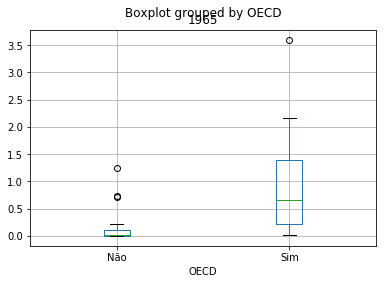

In [5]:
Boxplot = Consumo_carvão_setado.boxplot(column=1965, by="OECD")

In [6]:
#Escrever um texto que deixe claro o porque de eu fazer um boxplot

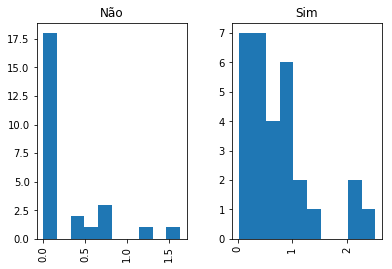

In [7]:
Histograma = Consumo_carvão_setado.hist(column=2000, by="OECD")

In [8]:
Consumo_carvão_setado_cru.loc["China"].head()

1965    0.158
1966    0.165
1967    0.143
1968    0.138
1969    0.162
Name: China, dtype: float64

# Modificando as tabelas para dar Join

### Igualando o número de colunas

In [9]:
Index_total_GDP = []
Index_total_carbono = []
Index_total_Junção = []


for i in GDP_capita_setado.index:
    Index_total_GDP.append(i)
    
for a in Consumo_carvão_setado.index:
    Index_total_carbono.append(a)

for b in Index_total_carbono:
    if b in Index_total_carbono:
        Index_total_Junção.append(b)

In [62]:
Transposed_GDP = GDP_capita_setado_cru.transpose()
Fragmentado_GDP = Transposed_GDP.loc[(Transposed_GDP.index > 1964) & (Transposed_GDP.index < 1980), :]
GDP_locado = Fragmentado_GDP.transpose()
GDP_modificado = Fragmentado_GDP.transpose()
Planilha_1 = GDP_modificado.loc[(Index_total_Junção) , : ]

Transposed_carvão = Consumo_carvão_setado_cru.transpose()
Fragmentado_carvão = Transposed_carvão.loc[(Transposed_carvão.index > 1964) & (Transposed_carvão.index < 1980), : ]
Carvão_locado = Fragmentado_carvão.transpose()
Carvão_modificado = Fragmentado_carvão.transpose()
Planilha_2  = Carvão_modificado.loc[(Index_total_Junção) , : ]

Planilha_2.head(5)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
country,,,,,,,,,,,,,,,
Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,0.00117,0.00144,0.00273,0.00345,0.0017,0.00384
Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,0.03800,0.04040,0.04060,0.03160,0.0445,0.03470
Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,1.66000,1.69000,1.73000,1.79000,1.8100,1.87000
Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,0.54900,0.47700,0.50700,0.42600,0.4330,0.47100
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dando join na tabela

Esse gráfico demonstra os dados na Tabela_2, referente ao consumo de carvão por pessoa


(61, 30)

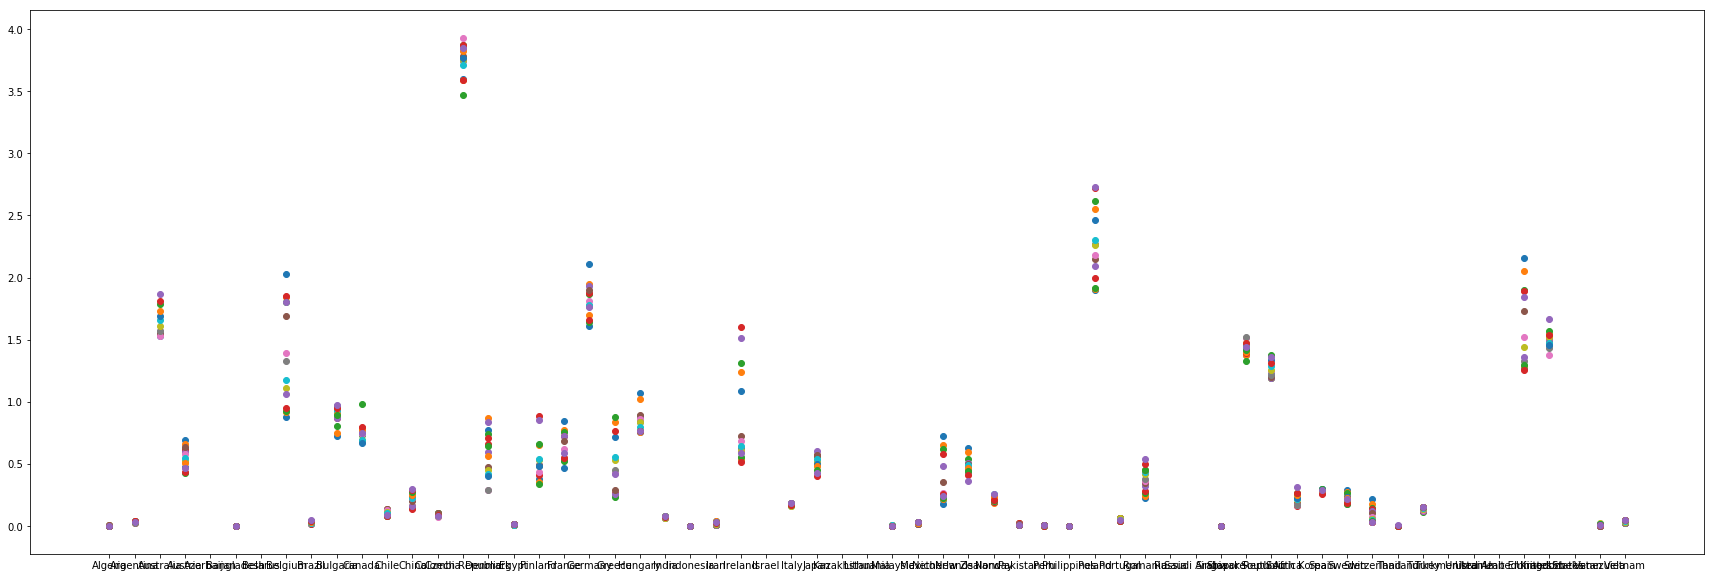

In [63]:
Planilhas_unificadas = Planilha_1.join(Planilha_2, how="inner" ,lsuffix='_GDP', rsuffix='_Carbon')

#Planilhas_unificadas.loc[: , ["1965_GDP","2001_Carbon"]].head(4)

plt.figure(figsize=(30,10))
for pais in Planilha_2.columns:
    plt.scatter(x=Planilha_2.index, y=Planilha_2[pais])

print("Esse gráfico demonstra os dados na Tabela_2, referente ao consumo de carvão por pessoa")
Planilhas_unificadas.head(6)
Planilhas_unificadas.shape

In [64]:
OECD = Planilhas_unificadas.loc[("Australia" , "Austria", "Belgium", "Canada", "Chile", "Czech Republic", "Denmark", "Estonia", 
                                    "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy",
                                   "Japan", "South Korea", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherland", "New Zealand",
                                   "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland",
                                   "Turkey", "United Kingdom", "United States") , :]


Países_estudados_total = Planilhas_unificadas.loc[("Argentina", "Brazil", "Chile", "United States", "Israel", "Poland"),  : ]

Países_estudados_OECD = Países_estudados_total.loc[("United States", "Israel", "Poland") , : ]

Países_estudados_nOECD = Países_estudados_total.loc[("Argentina", "Brazil"), : ]

Países_estudados_total.transpose()

United_States = Países_estudados_total.loc[("United States"), : ]

In [65]:
Consumo_carvão_setado["OECD"].head(5)

country
Algeria       Não
Argentina     Não
Australia     Sim
Austria       Sim
Azerbaijan    Não
Name: OECD, dtype: object

In [66]:
Consumo_carvão_setado.columns

Index([  1965,   1966,   1967,   1968,   1969,   1970,   1971,   1972,   1973,
         1974,   1975,   1976,   1977,   1978,   1979,   1980,   1981,   1982,
         1983,   1984,   1985,   1986,   1987,   1988,   1989,   1990,   1991,
         1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,   2000,
         2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,   2009,
         2010,   2011,   2012,   2013,   2014,   2015,   2016, 'OECD'],
      dtype='object')

# Scaterplot

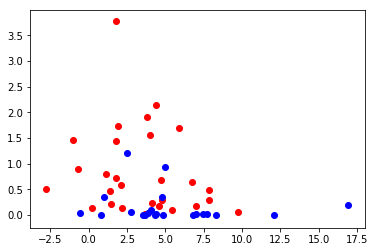

In [78]:
Planilha_1.loc[: , "OECD"] = "Não"
Planilha_1.loc[países_OECD , "OECD"] = "Sim"

Planilha_2.loc[: , "OECD"] = "Não"
Planilha_2.loc[países_OECD, "OECD"] = "Sim"

plt.scatter(Planilha_1.loc[Planilha_1.OECD=="Sim",1970], Planilha_2.loc[Planilha_2.OECD=="Sim", 1970], color="r")
plt.scatter(Planilha_1.loc[Planilha_1.OECD=="Não",1970], Planilha_2.loc[Planilha_2.OECD=="Não", 1970], color="b")


## Ajuste de Retas

In [79]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


# Dispersão mais *ajuste* de retas

Ajuste linear entre X3 e X4:
Coeficiente linear: 1.0521832148525423
Coeficiente angular: -0.06098579973407769
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.2477227943222936
Coeficiente angular: -0.015367713016835344


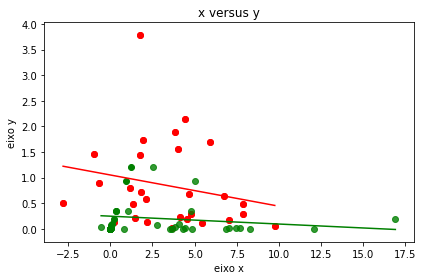

In [93]:
plt.scatter(Planilha_1.loc[Planilha_1.OECD=="Sim",1970], Planilha_2.loc[Planilha_2.OECD=="Sim", 1970], color="r")
reta(Planilha_1.loc[Planilha_1.OECD=="Sim",1970], Planilha_2.loc[Planilha_2.OECD=="Sim", 1970], "r")
plt.scatter(Planilha_2.loc[Planilha_2.OECD=="Não",1970], Planilha_2.loc[Planilha_2.OECD=="Não", 1970], color="g")
reta(Planilha_1.loc[Planilha_1.OECD=="Não",1970], Planilha_2.loc[Planilha_2.OECD=="Não", 1970], "g")

Ao analisar o coeficente de correlação da reta Vermelha, pode-se perceber que há uma correlação negativa entre 